In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

yellowknife ca
atuona pf
bluff nz
bluff nz
ushuaia ar
ushuaia ar
mumford gh
pisco pe
rocha uy
yellowknife ca
saint george bm
fez ma
tarko-sale ru
kapaa us
castro cl
itarema br
luanda ao
camana pe
belushya guba ru
longyearbyen sj
illoqqortoormiut gl
high level ca
pokaran in
tumannyy ru
hovd mn
kavieng pg
hinganghat in
capao bonito br
bellingham us
east london za
atuona pf
avarua ck
bredasdorp za
arraial do cabo br
roma au
mataura pf
mataura pf
busselton au
kismayo so
nikolskoye ru
aflu dz
castro cl
torbay ca
san patricio mx
butaritari ki
las palmas es
punta arenas cl
azimur ma
holme no
umzimvubu za
kendari id
praia cv
atuona pf
vaini to
albany au
castro cl
thompson ca
irbeyskoye ru
araceli ph
del rio us
hasaki jp
barrow us
punta arenas cl
dikson ru
kruisfontein za
mahebourg mu
bethel us
puerto ayora ec
illoqqortoormiut gl
yellowknife ca
cabo san lucas mx
castro cl
ajdabiya ly
saint-philippe re
saint-philippe re
faanui pf
barbar sd
pevek ru
busselton au
hilo us
albany au
nguiu au
muros e

hermanus za
kapaa us
cozumel mx
victoria sc
arraial do cabo br
ushuaia ar
cape town za
saldanha za
hilo us
saint-philippe re
provideniya ru
kapaa us
ushuaia ar
tuktoyaktuk ca
severo-kurilsk ru
mataura pf
puerto ayora ec
illoqqortoormiut gl
jalu ly
saskylakh ru
boende cd
gemena cd
tabiauea ki
puerto ayora ec
yellowknife ca
kununurra au
hobart au
nizhneyansk ru
albany au
belmonte br
puksoozero ru
butaritari ki
nanortalik gl
okha ru
georgetown sh
rikitea pf
hambantota lk
tuktoyaktuk ca
mys shmidta ru
kapaa us
patrasaer in
barrow us
barentsburg sj
lebu cl
praia da vitoria pt
atuona pf
punta arenas cl
chudniv ua
port hardy ca
killybegs ie
kaitangata nz
carnarvon au
ushuaia ar
qaanaaq gl
busselton au
sao filipe cv
belushya guba ru
mnogovershinnyy ru
khandyga ru
krasnoselkup ru
leningradskiy ru
cherskiy ru
sinnamary gf
vaini to
narsaq gl
vanimo pg
bafoulabe ml
mataura pf
beyneu kz
victoria sc
tekanpur in
luderitz na
vaini to
ancud cl
nikolskoye ru
illoqqortoormiut gl
rikitea pf
salinopolis br

bredasdorp za
nanortalik gl
hermanus za
marawi sd
port hardy ca
rikitea pf
hilo us
chuy uy
provideniya ru
codrington ag
ushuaia ar
barentsburg sj
dubbo au
belmonte br
tiksi ru
lagoa pt
jamestown sh
alofi nu
port macquarie au
arraial do cabo br
kapaa us
busselton au
punta arenas cl
north auburn us
barentsburg sj
faanui pf
rikitea pf
port hardy ca
labuhan id
vostok ru
busselton au
longyearbyen sj
lagoa pt
sorland no
berdigestyakh ru
nanortalik gl
othonoi gr
taolanaro mg
lorengau pg
archidona ec
hermanus za
mys shmidta ru
ponta do sol cv
olafsvik is
carutapera br
albany au
athabasca ca
luanda ao
komsomolskiy ru
ketchikan us
kapaa us
punta arenas cl
russell nz
aklavik ca
mar del plata ar
linjiang cn
illoqqortoormiut gl
luancheng cn
melita ca
hualmay pe
rocha uy
bluff nz
atuona pf
george town ky
jamestown sh
busselton au
jamestown sh
camacha pt
seoul kr
tasiilaq gl
taft ir
cherskiy ru
halifax ca
sorland no
cap malheureux mu
hilo us
chuy uy
gombong id
krasnoselkup ru
yellowknife ca
port blai

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
#Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | yellowknife
Processing Record 2 of Set 13 | atuona
Processing Record 3 of Set 13 | bluff
Processing Record 4 of Set 13 | ushuaia
Processing Record 5 of Set 13 | mumford
Processing Record 6 of Set 13 | pisco
Processing Record 7 of Set 13 | rocha
Processing Record 8 of Set 13 | saint george
Processing Record 9 of Set 13 | fez
Processing Record 10 of Set 13 | tarko-sale
Processing Record 11 of Set 13 | kapaa
Processing Record 12 of Set 13 | castro
Processing Record 13 of Set 13 | itarema
Processing Record 14 of Set 13 | luanda
Processing Record 15 of Set 13 | camana
Processing Record 16 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 13 | longyearbyen
Processing Record 18 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 13 | high level
Processing Record 20 of Set 13 | pokaran
Processing Record 21 of Set 13 | tumannyy
City not fou

Processing Record 29 of Set 16 | yeniseysk
Processing Record 30 of Set 16 | okakarara
Processing Record 31 of Set 16 | port alfred
Processing Record 32 of Set 16 | kaitangata
Processing Record 33 of Set 16 | mount isa
Processing Record 34 of Set 16 | kindu
Processing Record 35 of Set 16 | coquimbo
Processing Record 36 of Set 16 | marquette
Processing Record 37 of Set 16 | ayan
Processing Record 38 of Set 16 | mount gambier
Processing Record 39 of Set 16 | isoka
Processing Record 40 of Set 16 | varazdin
Processing Record 41 of Set 16 | amderma
City not found. Skipping...
Processing Record 42 of Set 16 | nueva loja
Processing Record 43 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 16 | constitucion
Processing Record 45 of Set 16 | kungurtug
Processing Record 46 of Set 16 | guerrero negro
Processing Record 47 of Set 16 | moctezuma
Processing Record 48 of Set 16 | antalaha
Processing Record 49 of Set 16 | karratha
Processing Record 50 of Set 16 | hithadho

Processing Record 12 of Set 20 | okha
Processing Record 13 of Set 20 | hambantota
Processing Record 14 of Set 20 | patrasaer
Processing Record 15 of Set 20 | praia da vitoria
Processing Record 16 of Set 20 | chudniv
Processing Record 17 of Set 20 | killybegs
Processing Record 18 of Set 20 | mnogovershinnyy
Processing Record 19 of Set 20 | khandyga
Processing Record 20 of Set 20 | krasnoselkup
Processing Record 21 of Set 20 | sinnamary
Processing Record 22 of Set 20 | vanimo
Processing Record 23 of Set 20 | beyneu
Processing Record 24 of Set 20 | tekanpur
Processing Record 25 of Set 20 | salinopolis
Processing Record 26 of Set 20 | clyde river
Processing Record 27 of Set 20 | karauzyak
City not found. Skipping...
Processing Record 28 of Set 20 | morros
Processing Record 29 of Set 20 | fort-shevchenko
Processing Record 30 of Set 20 | mwingi
Processing Record 31 of Set 20 | isangel
Processing Record 32 of Set 20 | lompoc
Processing Record 33 of Set 20 | slave lake
Processing Record 34 of 

Processing Record 49 of Set 23 | kirakira
Processing Record 50 of Set 23 | honiara
Processing Record 1 of Set 24 | manta
Processing Record 2 of Set 24 | hopewell
Processing Record 3 of Set 24 | ambilobe
Processing Record 4 of Set 24 | grosseto
Processing Record 5 of Set 24 | katherine
Processing Record 6 of Set 24 | north bend
Processing Record 7 of Set 24 | brigg
Processing Record 8 of Set 24 | chor
Processing Record 9 of Set 24 | anadyr
Processing Record 10 of Set 24 | lavrentiya
Processing Record 11 of Set 24 | fare
Processing Record 12 of Set 24 | ordynskoye
Processing Record 13 of Set 24 | poronaysk
Processing Record 14 of Set 24 | mecca
Processing Record 15 of Set 24 | rabo de peixe
Processing Record 16 of Set 24 | umm jarr
City not found. Skipping...
Processing Record 17 of Set 24 | vuktyl
Processing Record 18 of Set 24 | husavik
Processing Record 19 of Set 24 | noyabrsk
Processing Record 20 of Set 24 | cap malheureux
Processing Record 21 of Set 24 | richards bay
Processing Reco

In [9]:
len(city_data)

568

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,23.00,86,20,4.61,CA,2021-04-17 16:01:20
1,Atuona,-9.8000,-139.0333,80.46,73,88,17.36,PF,2021-04-17 16:01:53
2,Bluff,-46.6000,168.3333,52.00,91,85,8.99,NZ,2021-04-17 16:01:53
3,Ushuaia,-54.8000,-68.3000,53.60,54,75,16.11,AR,2021-04-17 16:01:42
4,Mumford,5.2618,-0.7590,84.94,69,92,13.09,GH,2021-04-17 16:01:54
5,Pisco,-13.7000,-76.2167,71.60,73,0,9.22,PE,2021-04-17 16:01:54
6,Rocha,-34.4833,-54.3333,74.62,56,2,4.88,UY,2021-04-17 16:01:55
7,Saint George,37.1041,-113.5841,57.00,50,75,4.61,US,2021-04-17 16:00:10
8,Fez,34.0372,-4.9998,69.80,49,75,8.05,MA,2021-04-17 16:01:55
9,Tarko-Sale,64.9225,77.7850,3.99,81,57,11.99,RU,2021-04-17 16:01:56


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-04-17 16:01:20,62.4560,-114.3525,23.00,86,20,4.61
1,Atuona,PF,2021-04-17 16:01:53,-9.8000,-139.0333,80.46,73,88,17.36
2,Bluff,NZ,2021-04-17 16:01:53,-46.6000,168.3333,52.00,91,85,8.99
3,Ushuaia,AR,2021-04-17 16:01:42,-54.8000,-68.3000,53.60,54,75,16.11
4,Mumford,GH,2021-04-17 16:01:54,5.2618,-0.7590,84.94,69,92,13.09
...,...,...,...,...,...,...,...,...,...
563,Kongolo,CD,2021-04-17 16:06:00,-5.3833,27.0000,78.42,77,59,5.03
564,Nefteyugansk,RU,2021-04-17 16:06:00,61.0998,72.6035,23.00,58,0,11.18
565,Pemangkat,ID,2021-04-17 16:06:01,1.1667,108.9667,78.71,81,100,4.85
566,Road Town,VG,2021-04-17 16:06:01,18.4167,-64.6167,84.20,74,20,11.50


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

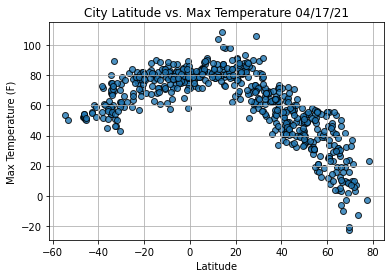

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

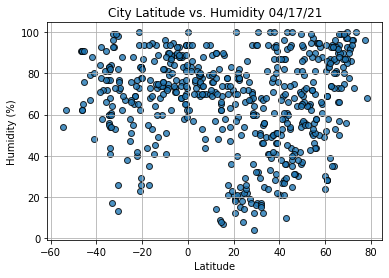

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

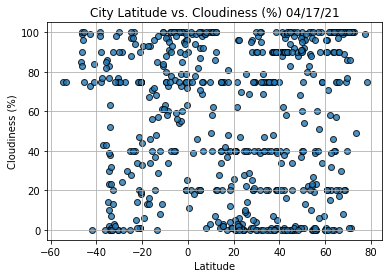

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

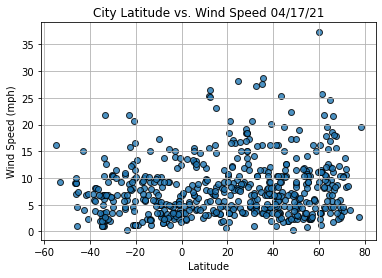

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()